# Pandas Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ri = pd.read_csv("police.csv", engine='python')

In [3]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
#note: NAN represents missing values
#values can be missing for many reasons
'''could be values not recorded at that time, data curruption, value is irrelevant, for piracy reasons  '''
#we mark NAN in dataset to distinguish it from real data

'could be values not recorded at that time, data curruption, value is irrelevant, for piracy reasons  '

In [5]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86406 non-null object
driver_age_raw        86414 non-null float64
driver_age            86120 non-null float64
driver_race           86408 non-null object
violation_raw         86408 non-null object
violation             86408 non-null object
search_conducted      91741 non-null bool
search_type           3196 non-null object
stop_outcome          86408 non-null object
is_arrested           86408 non-null object
stop_duration         86408 non-null object
drugs_related_stop    91741 non-null bool
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+ MB


In [6]:
ri.shape

(91741, 15)

In [7]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [8]:
#count of missing data in each column

ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [9]:
# Remove the column which has only missing column (based on shape & isnull().sum() methods)
#axis = 1 or columns
''' Have to assign back to dataframe (because it is a new copy). inplace = false by default
df = df.some_operation(inplace=False) 

# No need to assign back to dataframe (because it is on the same copy)
df.some_operation(inplace=True)'''

ri.drop('county_name', axis = 'columns', inplace = True)
ri.shape



#best way to drop all NAN columns

#ri.dropna(axis = 'columns', how = 'all').shape

#this is also possible
# del ri['column_name']

(91741, 14)

In [10]:
# to see the columns in the data frame
ri.columns


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

# Do men or Women speed more ofter?

## Hint:driver_gender, voilation

In [11]:
normalize = True#first get the violation for speeding then find the total no. of males, females from gender column who speed
#below line can also be written as
#ri[ri['violation'] == 'Speeding']

ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize = True)

#value_counts() method returns the count of values in the column
#normalize = true return the relative frequency







M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [12]:
#fliping the above line 
ri[ri.driver_gender == 'M'].violation.value_counts(normalize = True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [13]:
#females

ri[ri.driver_gender == 'F'].violation.value_counts(normalize = True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [14]:
#combine the above two lines in a single line
# use groupby('attribute')
#groupby is similar to for each
ri.groupby('driver_gender').violation.value_counts(normalize = True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [15]:
#use loc[[i], [j]] to extract the desired i rows and j columns
#label based indexing

ri.groupby('driver_gender').violation.value_counts(normalize = True).loc[:, 'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

In [16]:
ri.groupby('driver_gender').violation.value_counts(normalize = True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


# Does gender affects who gets searched during a stop?

## Hint: driver_gender, search_conducted


In [17]:
ri.search_conducted.value_counts(normalize = True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [18]:
ri.search_conducted.mean()

#since mean of boolean values will give you the same value as True(in above code)
#true = 1 False = 0, mean will calculate only the true values, hence mean will be same as True value

0.03483720473942948

In [19]:
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

# Why is search_type missing so often?

In [20]:
#no. of missing values in each column
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [21]:
#dropna = False shows us the nan values

ri.search_type.value_counts(dropna = False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Protective

In [22]:
ri.search_conducted.value_counts()

#we can say that since 88545 times search was not conducted, hence the are so often missing

False    88545
True      3196
Name: search_conducted, dtype: int64

In [23]:
#dropna = False shows us the nan values
ri[ri.search_conducted == False].search_type.value_counts(dropna = False)


#we can say that since 88545 times search was not conducted, hence the are so ofte

NaN    88545
Name: search_type, dtype: int64

# During a search how oftern is the driver frisked?

In [24]:
#using pandas string searching
ri.search_type.str.contains('Protective Frisk')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24       True
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
91711     NaN
91712     NaN
91713     NaN
91714     NaN
91715     NaN
91716     NaN
91717     NaN
91718     NaN
91719     NaN
91720     NaN
91721     NaN
91722     NaN
91723     NaN
91724     NaN
91725     NaN
91726     NaN
91727     NaN
91728     NaN
91729     NaN
91730     NaN
91731     NaN
91732     NaN
91733     NaN
91734     NaN
91735     NaN
91736     NaN
91737     NaN
91738     NaN
91739     NaN
91740     NaN
Name: search_type, Length: 91741, dtype: object

In [25]:
#save that in new column name- frisk

ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [26]:
#now we can get eh value count on this new column, frisk

#dropna = False will show the value count of NaN values too. it is ignored by default
ri.frisk.value_counts(dropna = False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [27]:
ri.frisk.sum()

274

In [29]:
#mean won't include NaN values, just True = 1, False = 0 to calculate mean
ri.frisk.mean()

0.08573216520650813

# Which year has least no. of stops?

In [31]:
ri.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [34]:
#combine columns in a dataframe

combined = ri.stop_date.str.cat(ri.stop_time, sep = ' ')
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
5        2005-03-23 09:45
6        2005-04-01 17:30
7        2005-06-06 13:20
8        2005-07-13 10:15
9        2005-07-13 15:45
10       2005-07-13 16:20
11       2005-07-13 19:00
12       2005-07-14 19:55
13       2005-07-18 19:30
14       2005-07-18 19:45
15       2005-07-19 00:30
16       2005-07-19 00:30
17       2005-07-19 23:30
18       2005-07-20 00:05
19       2005-07-24 20:10
20       2005-07-28 12:37
21       2005-08-07 16:50
22       2005-08-08 02:09
23       2005-08-18 10:57
24       2005-08-28 01:00
25       2005-09-03 16:02
26       2005-09-17 10:54
27       2005-09-21 13:30
28       2005-09-22 22:34
29       2005-09-26 01:05
               ...       
91711    2015-12-30 15:42
91712    2015-12-30 16:19
91713    2015-12-30 17:07
91714    2015-12-30 17:39
91715    2015-12-30 23:26
91716    2015-12-30 23:33
91717    2015-12-31 00:00
91718    201

In [35]:
#storing the combined in a new column of dataframe

ri['stop_datetime'] = pd.to_datetime(combined)

#to verify check with dtypes

ri.dtypes


stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [37]:
#now to extract date from our new column

ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [39]:
#if you want just minimum the value
ri.stop_datetime.dt.year.value_counts().sort_values().index[0]

2005

# how does drug activity change by time a day

## Hint: stop_datetime, drug_related_stop


In [40]:
ri.drugs_related_stop.value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [41]:
ri.drugs_related_stop.mean()

0.008883705213590434

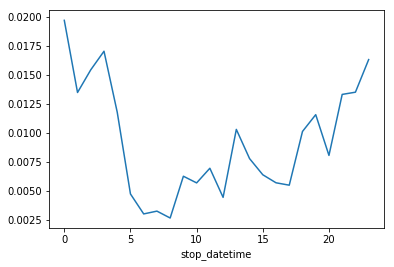

In [44]:
#default is line plot, no need of plt.show() if you're using jupyter
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

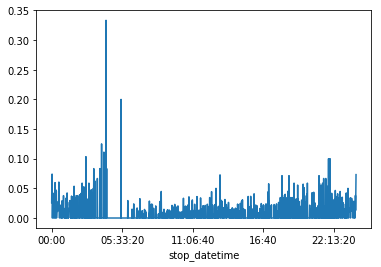

In [45]:
#can also use time instead of hour
ri.groupby(ri.stop_datetime.dt.time).drugs_related_stop.mean().plot()

In [46]:
#use can see from the above gragh that drug activites are high during late night and low during day time

# Do most stops occur at night?

In [55]:
ri.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

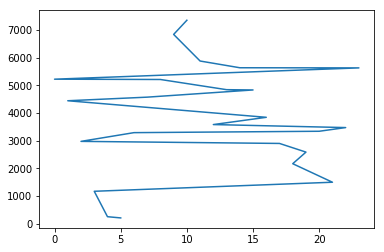

In [53]:
ri.stop_datetime.dt.hour.value_counts().plot()

'we can also use sort_values() to sort by values ie sorts the values in the right in the series'

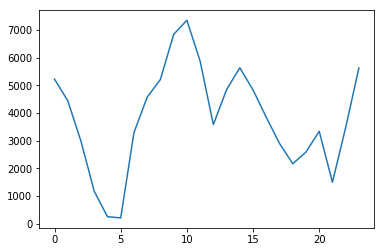

In [54]:
#to fix the above graph we sort the index values(sorts the values in the left of the series)

ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

#value_counts() sorts the values in descending order. 
'''we can also use sort_values() to sort by values ie sorts the values in the right in the series'''

In [56]:
#another way to approach it - we defined the day as time between 4am to 10om

ri[(ri.stop_datetime.dt.hour < 22) & (ri.stop_datetime.dt.hour > 4)].shape

(68575, 16)

In [60]:
ri.groupby(ri.stop_datetime.dt.hour).stop_time.count()

stop_datetime
0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_time, dtype: int64

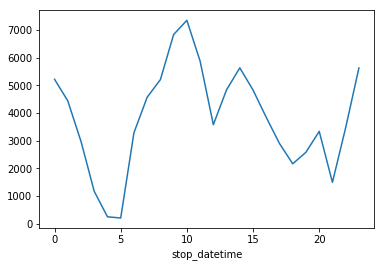

In [62]:
#plotting 
ri.groupby(ri.stop_datetime.dt.hour).stop_time.count().plot()

# Find the bad data in stop_duration column and fix it

In [64]:
'''bad data is errorneous'''

#Note: always documents the assumptions or changes you're making so that it will be easy for others who're analysing

'''To fix the data -
1) remove those rows
2) replace with some value'''


ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [70]:
#the above data has 1, 2 as bad data, so we change it to NaN

ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'

E:\Softwares\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [71]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [72]:
#as you see it didn't change anything. since it's wrong way to do it. We need to use loc

ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [74]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [76]:
#we have two Nan which is wrong. Use np.NaN instead since NaN is not a string as we used above.

import numpy as np

ri.loc[ri.stop_duration == 'NaN'] = np.NaN
ri.stop_duration.value_counts(dropna = False)


0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64